In [202]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy
import sklearn

In [2]:
df=pd.read_csv("avacado.csv",index_col=0,parse_dates=["Date"])
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-08-11,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-01-11,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
df.shape

(1517, 13)

In [4]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [5]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
def isNaN(num):
    return num != num

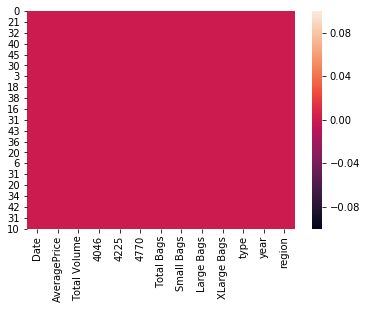

In [9]:
sns.heatmap(df.isnull())

In [10]:
df_Dates=pd.DataFrame()
df_Dates["day"]=df["Date"].dt.day_name()
df_Dates["year"]=df["Date"].dt.year
df_Dates["month"]=df["Date"].dt.month_name()
df_Dates["AveragePrice"]=df["AveragePrice"]

In [11]:
df_Dates["type_of_day"]=np.where((df_Dates["day"]=="Sunday")|(df_Dates["day"]=="Saturday"),"weekend","weekday")


In [12]:
df_Dates

,day,year,month,AveragePrice,type_of_day
0,Sunday,2015,December,1.33,weekend
1,Sunday,2015,December,1.35,weekend
2,Sunday,2015,December,0.93,weekend
3,Friday,2015,June,1.08,weekday
4,Sunday,2015,November,1.28,weekend
...,...,...,...,...,...
10,Sunday,2016,October,1.39,weekend
11,Saturday,2016,September,1.51,weekend
12,Wednesday,2016,February,1.48,weekday
13,Sunday,2016,September,1.47,weekend


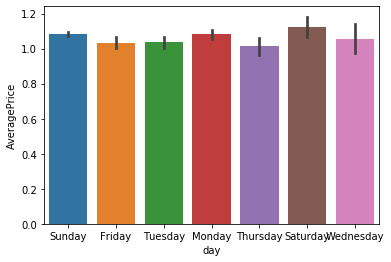

In [13]:
sns.barplot(x="day",y="AveragePrice",data=df_Dates)
plt.show()
#AVERAGE PRICE ON SATURDAY IS THE HIGHEST COMPARITIVELY

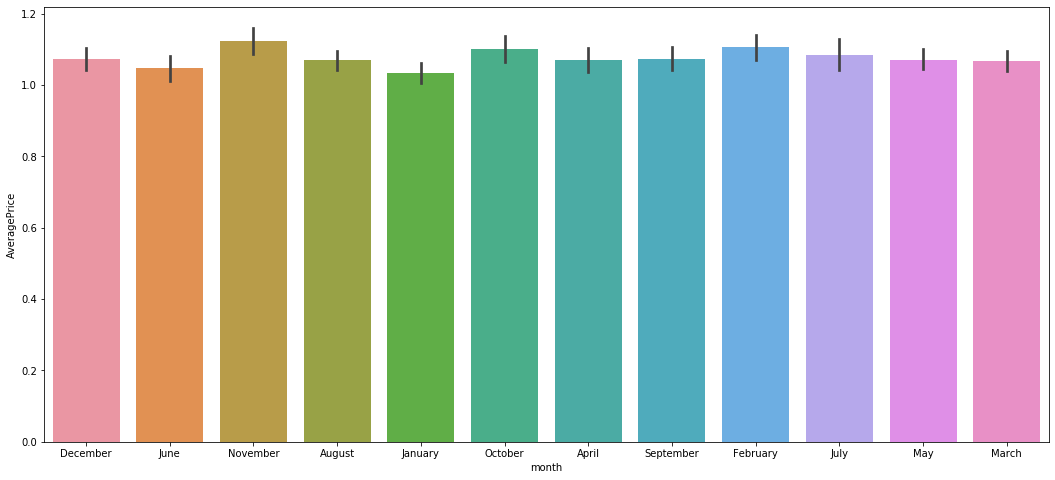

In [14]:
plt.figure(figsize = (18, 8))
sns.barplot(x="month",y="AveragePrice",data=df_Dates)
plt.show()

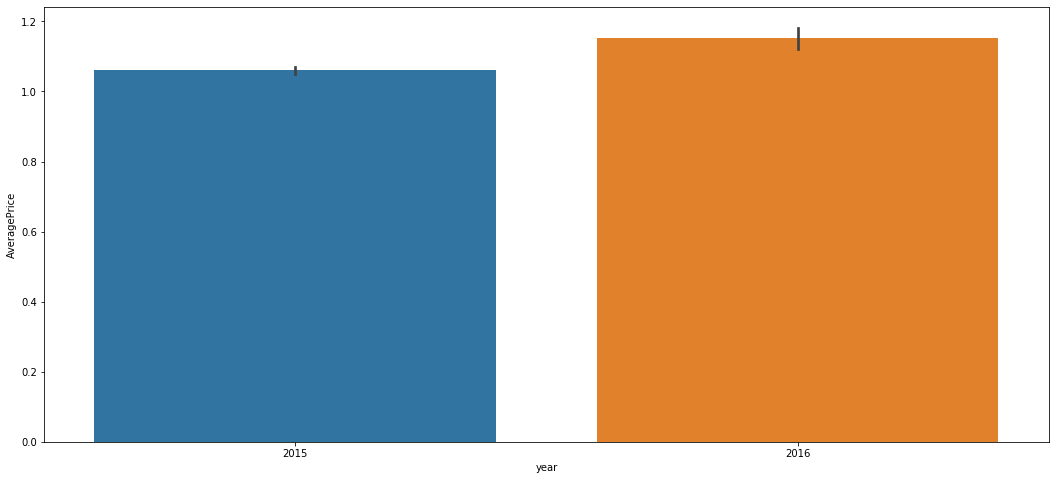

In [15]:
plt.figure(figsize = (18, 8))
sns.barplot(x="year",y="AveragePrice",data=df_Dates)
plt.show()

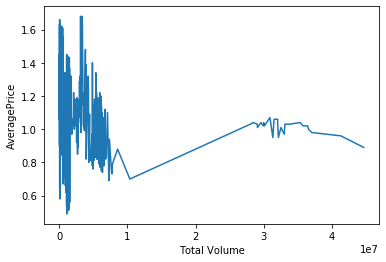

In [16]:
sns.lineplot(x="Total Volume",y="AveragePrice",data=df)

In [17]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [18]:
df['type'].unique()

array(['conventional'], dtype=object)

In [19]:
df.groupby('Total Volume')['AveragePrice'].mean()

Total Volume
38750.74       1.35
40391.55       1.40
40507.36       1.07
40873.28       1.22
41143.51       1.33
               ... 
36400886.58    1.02
36549995.66    1.00
37026085.75    0.98
41291704.39    0.96
44655461.51    0.89
Name: AveragePrice, Length: 1517, dtype: float64

<Figure size 1440x720 with 0 Axes>

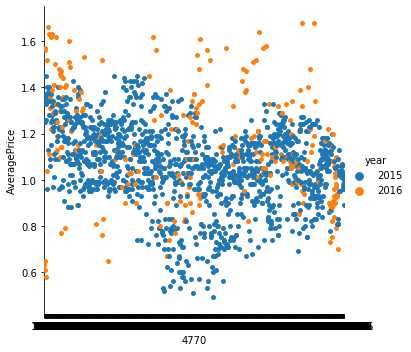

In [20]:
plt.figure(figsize = (20,10))
g=sns.catplot(x="4770",y="AveragePrice",hue="year",data=df,kind="strip"[:25])
plt.show()

In [21]:
df.corr()
#almost all the factors have negtaive corrrelation with the price that is when all the factors increase (eg total volume) increases price decreases

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


In [22]:
dfcor=df.corr()

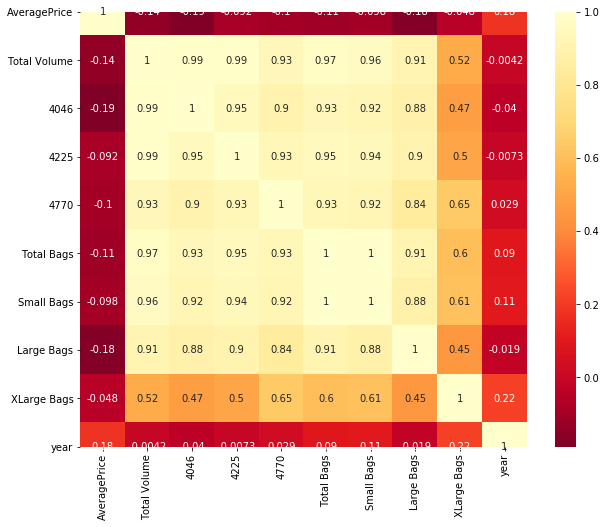

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

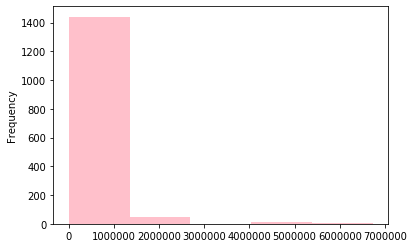

In [24]:
df['Total Bags'].plot.hist(color="pink",bins=5)

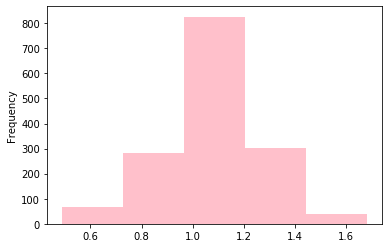

In [25]:
df['AveragePrice'].plot.hist(color="pink",bins=5)

In [26]:
df['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

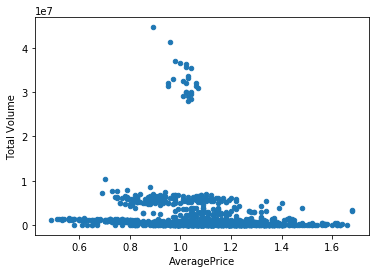

In [27]:
df.plot.scatter('AveragePrice','Total Volume')

In [28]:
#lets find average price using regression
#cleaning up the data
df.drop(['region'],axis=1,inplace=True)

In [29]:
df.drop(['Date'],axis=1,inplace=True)

In [30]:
df.drop(["type"],axis=1,inplace=True)

In [31]:
df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,2015
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,2015
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,2015
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,2015
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,2015


In [32]:
df.drop(["year"],axis=1,inplace=True)

In [33]:
df.drop(["XLarge Bags"],axis=1,inplace=True)

In [35]:
df.shape

(1517, 8)

In [36]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69


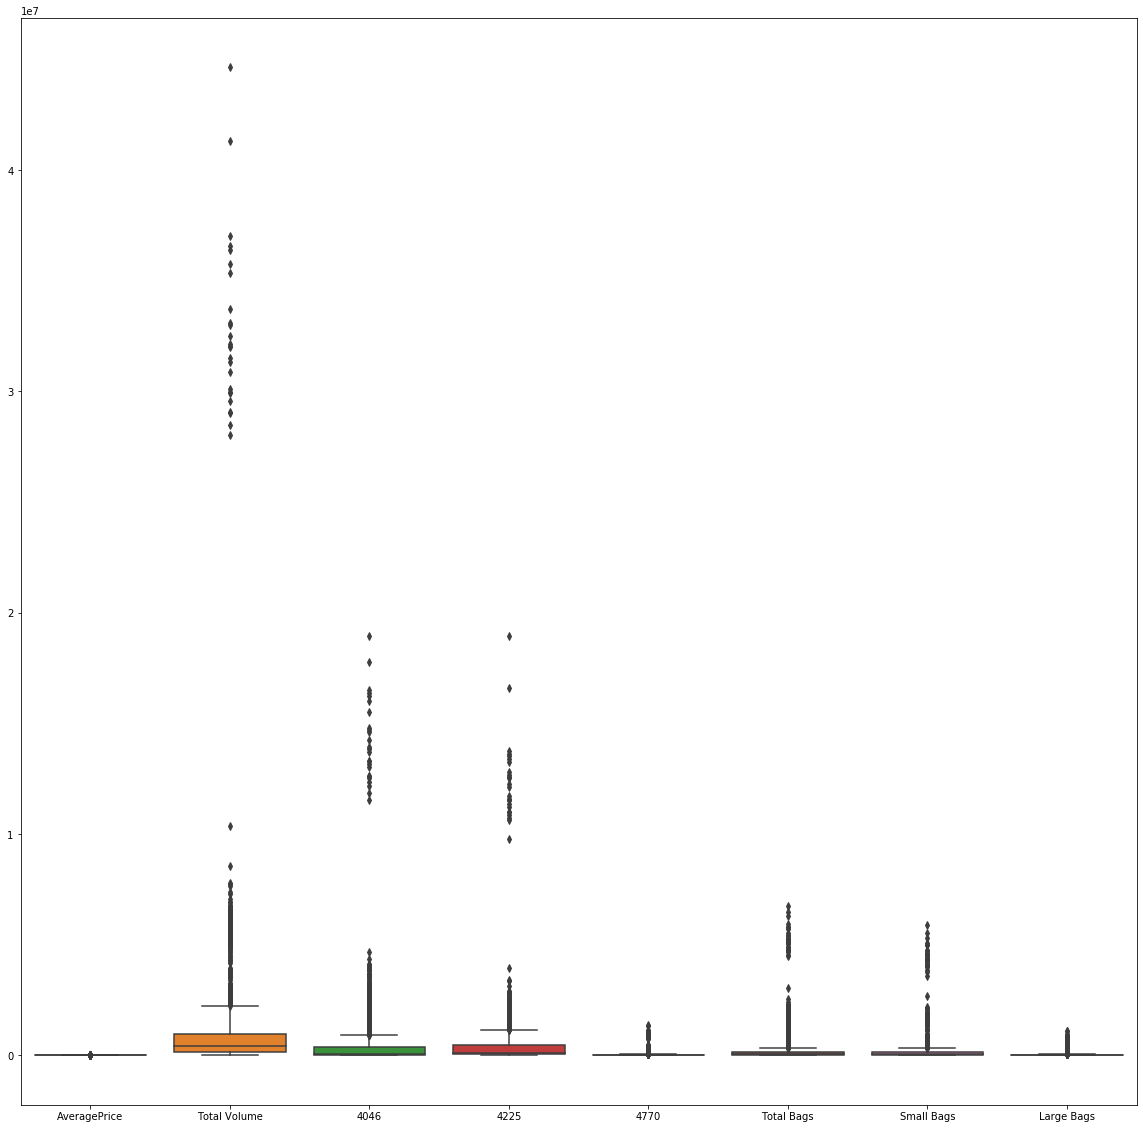

In [37]:
plt.figure(figsize = (20,20))
sns.boxplot(data=df)
#outliers are present

In [38]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[1.35048079 0.34696593 0.33149016 ... 0.37599382 0.37105465 0.36004386]
 [1.45639674 0.34907791 0.33167633 ... 0.37492657 0.3698118  0.36000798]
 [0.76783831 0.33478463 0.33161448 ... 0.37672169 0.37192201 0.35996017]
 ...
 [2.14485045 0.32120275 0.30820887 ... 0.305099   0.30194984 0.29095317]
 [2.09189247 0.31878364 0.30423037 ... 0.30309833 0.29836419 0.29078309]
 [1.88006056 0.3201721  0.30987728 ... 0.29627155 0.29557902 0.26226571]]


In [39]:
threshold=3
print(np.where(z>3))

(array([ 412,  760, 1059, 1182, 1182, 1182, 1182, 1182, 1182, 1182, 1183,
       1183, 1183, 1183, 1183, 1183, 1183, 1184, 1184, 1184, 1184, 1184,
       1184, 1184, 1185, 1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186,
       1186, 1186, 1186, 1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187,
       1187, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189,
       1189, 1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192, 1192,
       1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193, 1194,
       1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195,
       1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196, 1197, 1197,
       1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198, 1198, 1198,
       1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199, 1200, 1200, 1200,
       1200, 1200, 1200, 1200, 1201, 1201, 1201, 1201, 1201, 1201, 1201,
       1202, 1202, 1202, 1202, 1202, 1202, 1202, 1

In [40]:
df = df[(z < 3).all(axis=1)]

In [41]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69
...,...,...,...,...,...,...,...,...
10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65
11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56
12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16
13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26


In [42]:
df.shape

(1471, 8)

In [44]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69


In [53]:
#now our data is ready lets select training and target  variable
x=df.iloc[:,1:8]
y=df['AveragePrice']



In [72]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=133)

In [73]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
lr.score(x_test,y_test)

0.24503556135209156

In [76]:
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)        

max r2 score corresponding to  132  is  0.24839899640049679


In [77]:
pred=lr.predict(x_test)
print("Predicted avg price:",pred)
print("actual avg price",y_test)

Predicted avg price: [1.07407562 0.83404943 1.05197613 1.07944153 1.18865716 1.09570683
 1.11785486 1.02703795 1.19379765 1.11030236 1.0905705  0.6800905
 1.18367554 1.07696333 1.08407481 1.09432462 1.13101236 1.0249811
 1.05248596 1.00818092 1.06818958 1.12904555 1.07665592 1.09459187
 1.08677515 1.1396273  1.14481327 1.13735305 1.08868961 1.2052578
 0.96810634 1.15596085 1.06656854 1.11125655 1.09285911 1.1822359
 1.10251446 1.10569473 1.09837726 1.14981658 1.02559452 1.11206957
 1.09935306 0.97058135 1.07960464 1.07991741 1.07806738 1.04752144
 1.09458    1.07561559 1.10944276 1.07051157 1.12958337 1.09334241
 1.10204637 1.13720318 1.1242111  1.13132605 1.08476674 1.13543021
 1.16832967 1.10566687 1.09659255 1.01836393 1.07677445 0.97213658
 1.01237209 1.08400998 1.19238422 1.14793028 0.99329596 1.13941252
 1.06537987 1.1005332  0.87895141 1.01534103 1.08294311 1.08597875
 1.05483999 1.08777708 1.0856501  1.09161483 1.09271645 1.06183109
 1.04629863 1.08361804 1.14863213 1.096609   

In [78]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.13402688630369852
Root Mean Squared Error: 0.17313851582524023


In [79]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))


0.1784181796447275


In [80]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [84]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13402688630369852
MSE: 0.02997694566216696
RMSE: 0.17313851582524023


In [81]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[-1.87966399e-07  5.52204221e-08  2.77777937e-07  1.70321838e-07
 -8.92421579e-07  1.19328593e-06  4.11400905e-07]
0.24071635338100128


In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

pred1=rf.predict(x_test)


In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 0.06044406779661018
MSE: 0.00659480338983051
RMSE: 0.0812083948236296


In [89]:
#rmse mse and mae is now lower model improved


In [ ]:
#regression model gives a low accuracy lets convert it into a classification model

In [109]:
df_new=pd.read_csv("avacado.csv",index_col=0)

In [110]:
df_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [111]:
df_new.drop(["year"],axis=1,inplace=True)

In [112]:
df_new.drop(['Date'],axis=1,inplace=True)

In [113]:
df_new.drop(["XLarge Bags"],axis=1,inplace=True)

In [114]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,Albany


In [115]:
df_new.drop(['type'],axis=1,inplace=True)

In [116]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,Albany


In [117]:
from sklearn.preprocessing import LabelEncoder

In [119]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

df_new['region'] = number.fit_transform(df_new['region'].astype(str))


In [122]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0


In [123]:
df_new['region'].value_counts()

6     76
0     67
2     65
3     65
4     62
1     54
31    52
5     51
44    49
9     47
26    44
19    41
12    40
42    39
38    38
49    36
22    34
47    34
7     31
34    30
28    29
17    29
50    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
15    19
46    19
24    18
14    18
10    17
37    17
23    17
18    16
35    16
45    16
39    15
30    13
16    13
27    12
33    12
20    10
43     9
40     9
21     3
Name: region, dtype: int64

In [167]:
lm=LogisticRegression()

In [177]:
columns_target=['region']
columns_train=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags']
x=df[columns_train]
y=df[columns_target]

In [178]:
lm=LogisticRegression()

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=168)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [181]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score)

[[0 0 6 ... 0 1 0]
 [0 1 0 ... 0 4 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 5 3 0]
 [0 0 0 ... 0 0 0]]
0.3473684210526316


In [182]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test) 


In [183]:
# random forest classifier works best 
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[15  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  2]]
0.9447368421052632


In [188]:
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

score=cross_val_score(rf,x,y,cv=5)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(rf,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.82407407 0.92675159 0.91419142 0.94576271 0.86120996]
Mean Scores 0.8943979523699788
Standard deviation 0.044997262735379864
Y Prediction values
['Albany' 'Albany' 'Albany' ... 'Charlotte' 'Charlotte' 'Charlotte']


array([[63,  0,  0, ...,  0,  0,  0],
       [ 0, 43,  0, ...,  0,  0,  0],
       [ 0,  0, 61, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 25,  0,  0],
       [ 0,  0,  0, ...,  0, 28,  0],
       [ 0,  0,  0, ...,  0,  0, 21]], dtype=int64)

In [191]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0.65452904 0.82773019 0.77368357 0.81554639 0.71628874]
Mean Scores 0.7575555860147813
Standard deviation 0.06459867214058693
Y Prediction values
['Albany' 'Albany' 'Albany' ... 'Charlotte' 'RaleighGreensboro'
 'Charlotte']


array([[60,  0,  0, ...,  0,  0,  0],
       [ 0, 38,  0, ...,  0,  0,  0],
       [ 0,  0, 55, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 25,  0,  0],
       [ 0,  0,  0, ...,  0, 26,  0],
       [ 0,  0,  0, ...,  0,  0, 20]], dtype=int64)

In [193]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [194]:
predsvc=svc.predict(x_test)
print('actual and predicted region',accuracy_score(y_test,predsvc))

actual and predicted region 0.034210526315789476


In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

In [198]:
print(classification_report(y_test,predknn))

                     precision    recall  f1-score   support

             Albany       0.80      1.00      0.89        16
            Atlanta       0.71      0.83      0.77        12
BaltimoreWashington       0.87      0.87      0.87        15
              Boise       1.00      1.00      1.00        13
             Boston       0.74      0.93      0.82        15
   BuffaloRochester       0.86      0.92      0.89        13
         California       0.81      0.88      0.85        25
          Charlotte       0.86      0.86      0.86         7
            Chicago       1.00      0.80      0.89         5
           Columbus       1.00      0.93      0.96        14
      DallasFtWorth       0.67      0.80      0.73         5
             Denver       0.88      1.00      0.93         7
            Detroit       0.82      1.00      0.90         9
        GrandRapids       1.00      0.67      0.80         9
         GreatLakes       0.67      0.50      0.57         4
 HarrisburgScranton    

In [204]:
rfc_cv_score = cross_val_score(rf, x, y, cv=10)

In [205]:
rfc_cv_score

array([0.89142857, 0.88823529, 0.93333333, 0.9125    , 0.94805195,
       0.95302013, 0.96527778, 0.89130435, 0.88888889, 0.91338583])

In [208]:
from sklearn.externals import joblib
joblib.dump(rf,'rfavacado.obj')
rf_from_joblib=joblib.load('rfavacado.obj')